<a href="https://colab.research.google.com/github/heyrobin/Movie-Sales-Prediction-/blob/main/TMDB_Box_Office_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Machine Learning with Python: Zero to GBMs/TMDB Dataset/train.csv')
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Machine Learning with Python: Zero to GBMs/TMDB Dataset/test.csv')
submission_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Machine Learning with Python: Zero to GBMs/TMDB Dataset/sample_submission.csv')

# New section

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_df.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train_df.shape

(3000, 23)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [8]:
train_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [9]:
test_df.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [10]:
import matplotlib.pyplot as plt

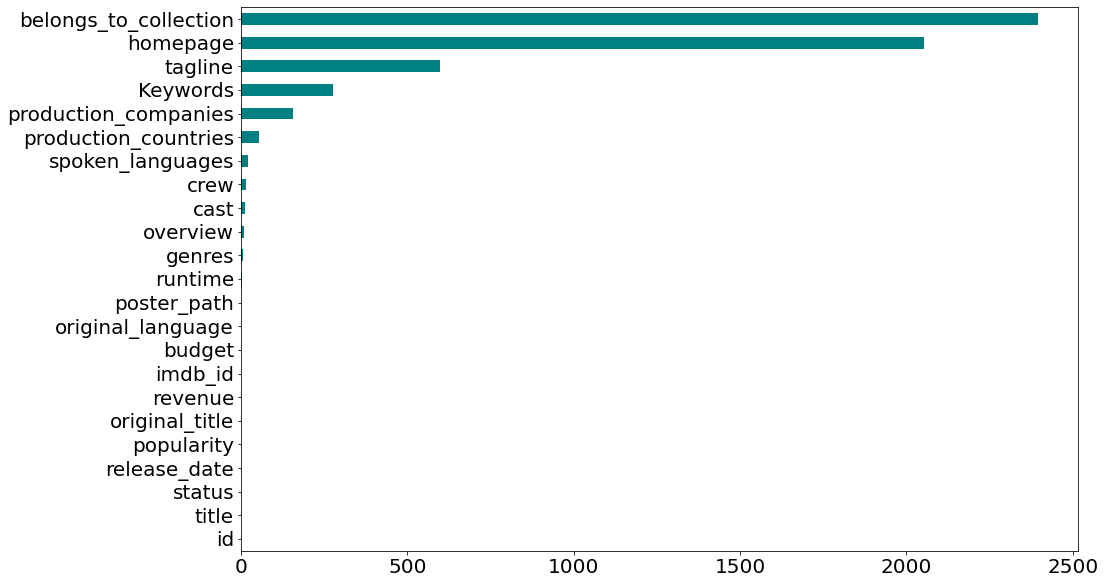

In [11]:
fig = plt.figure(figsize=(15, 10))
train_df.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20, color='teal');

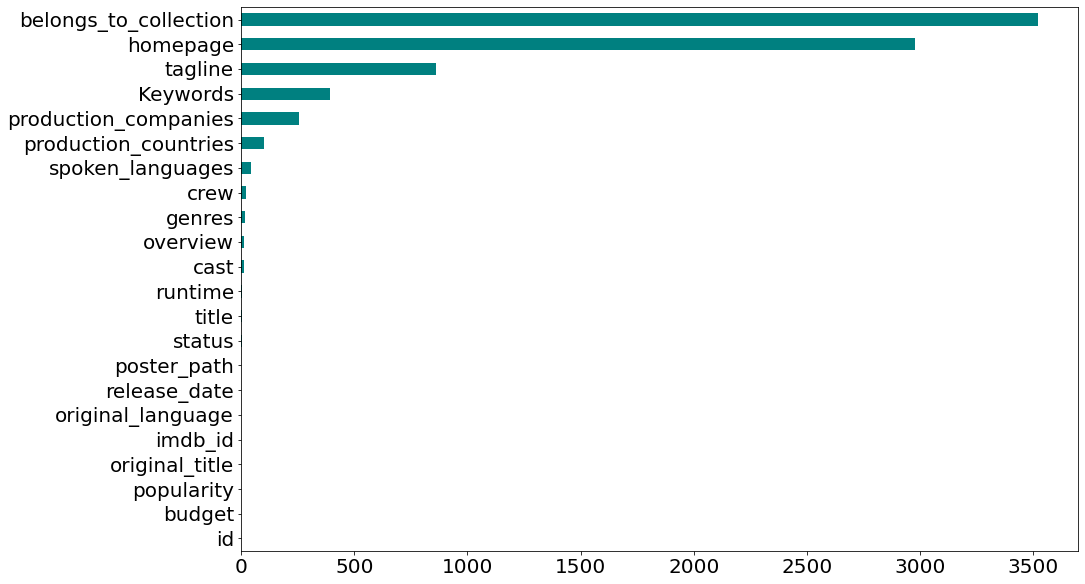

In [12]:
fig = plt.figure(figsize=(15, 10))
test_df.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20, color='teal');

In [13]:
train_df.select_dtypes(exclude='object').isna().sum()

id            0
budget        0
popularity    0
runtime       2
revenue       0
dtype: int64

# EDA

In [ ]:
eda = train_df.copy()

In [ ]:
eda.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [ ]:
import warnings; warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
eda_num = eda.select_dtypes(exclude='object')
eda_num.columns

Index(['id', 'budget', 'popularity', 'runtime', 'revenue'], dtype='object')

In [ ]:
eda_num_columns = ['budget', 'popularity', 'runtime']

In [ ]:
list(enumerate(eda_num_columns))

[(0, 'budget'), (1, 'popularity'), (2, 'runtime')]

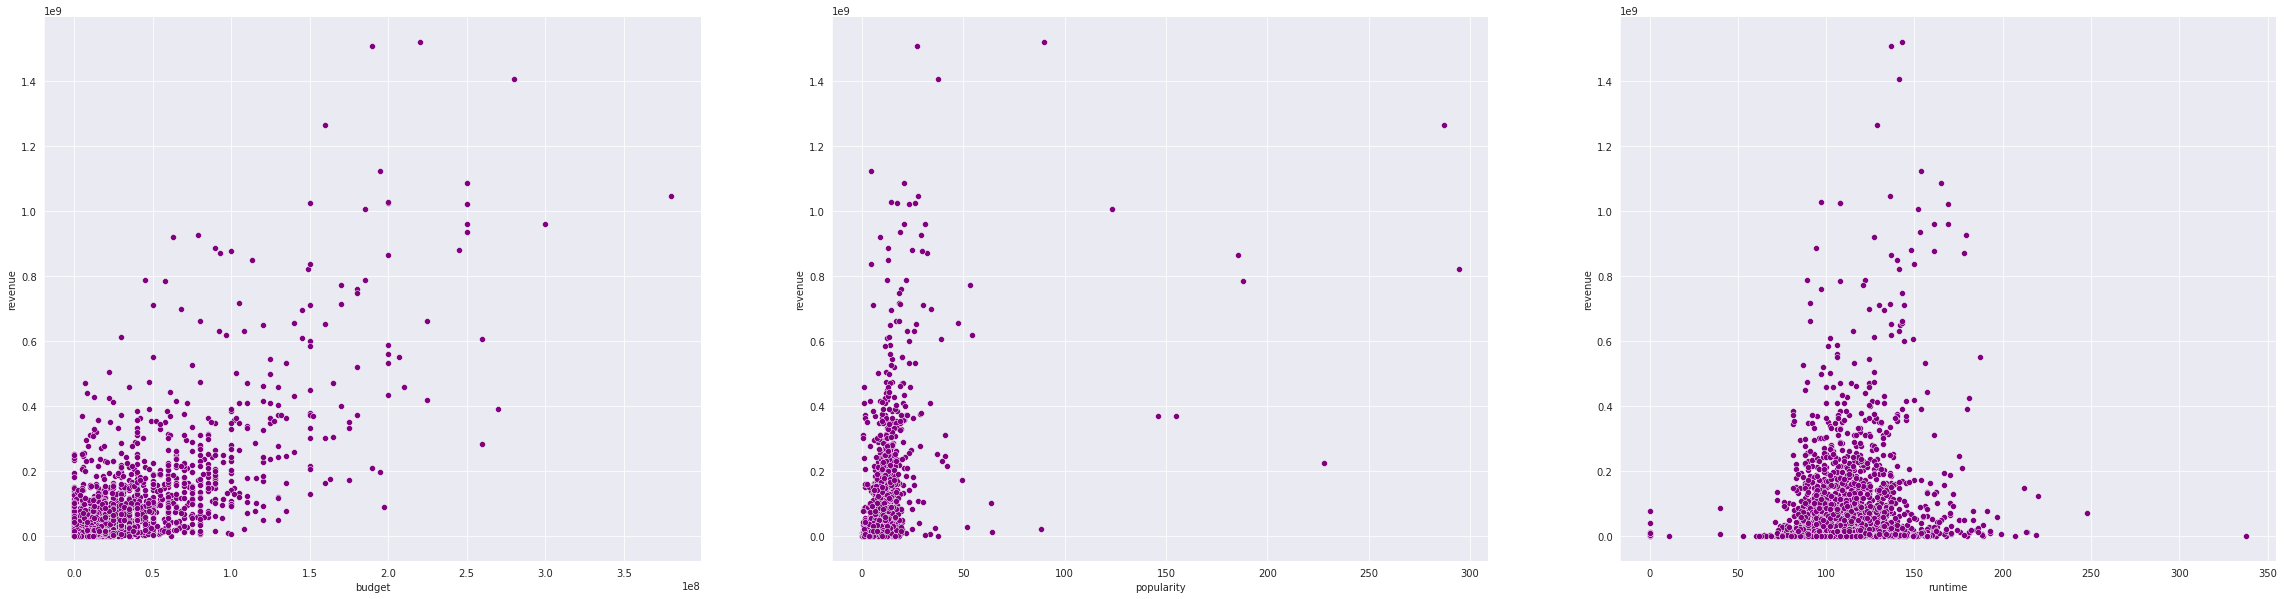

In [ ]:
Y = eda['revenue']
plt.figure(figsize=(40,10))
sns.set_style("darkgrid")
sns.color_palette("rocket_r", as_cmap=True)




for i in enumerate(eda_num_columns):
    plt.subplot(1,3,i[0]+1)
    sns.scatterplot(x=eda[i[1]], y=Y, color='purple')
    sns.despine()
    

In [ ]:
from scipy.stats import norm

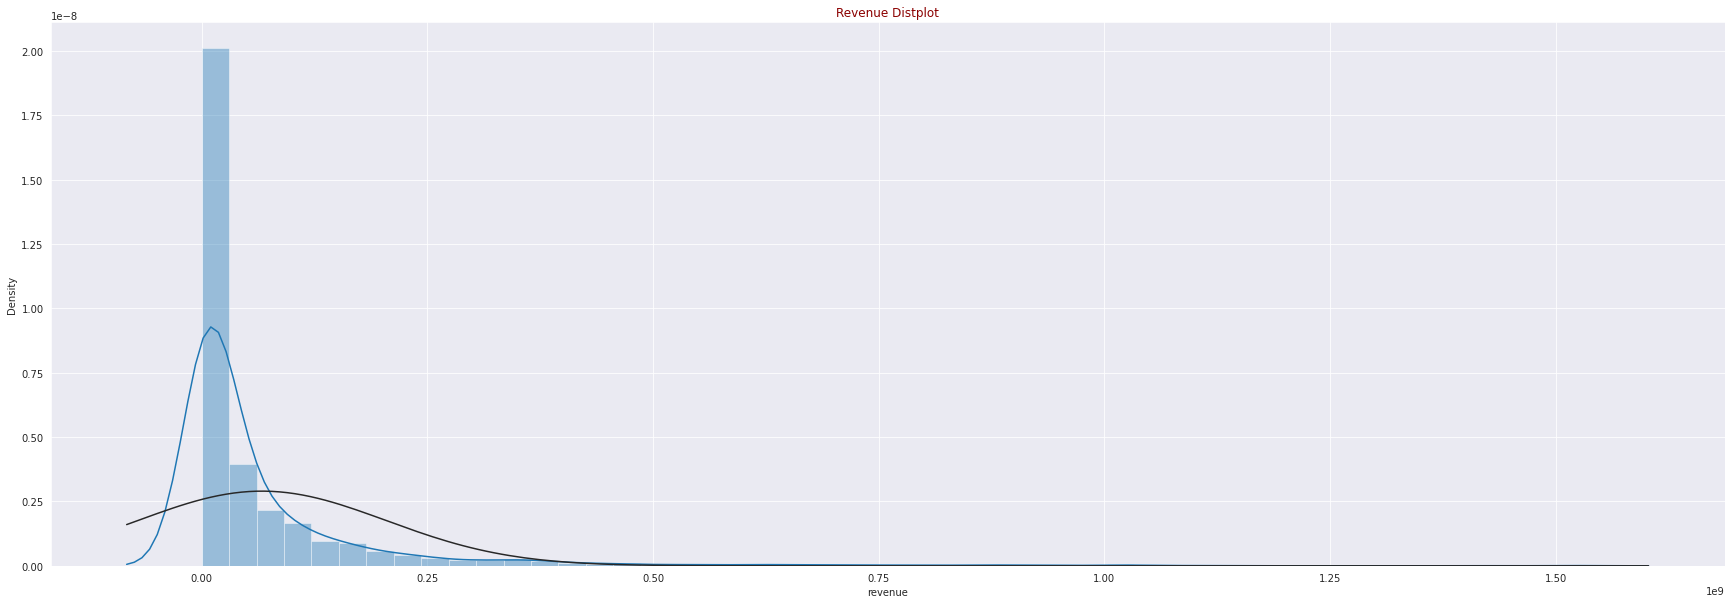

In [ ]:
plt.figure(figsize=(30,10))

sns.distplot(eda["revenue"], fit=norm)
plt.title("Revenue Distplot", color = "darkred")
plt.show()

our target variable is skewed converting it to log.

In [ ]:
import numpy as np


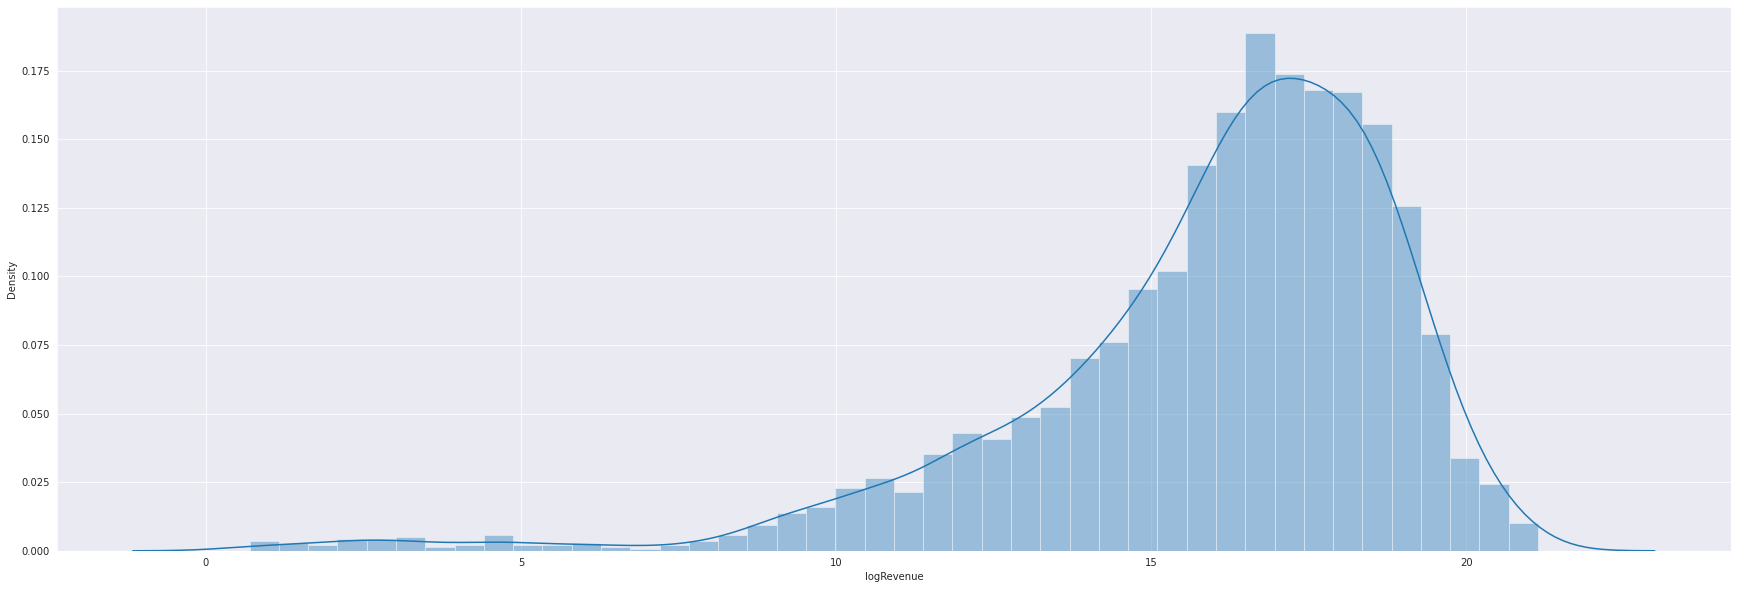

In [ ]:
plt.figure(figsize=(30,10))

eda['logRevenue'] = np.log1p(eda['revenue'])
sns.distplot(eda['logRevenue'] );

In [ ]:
def date_fuction(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month']  = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df.drop(columns=['release_date'], inplace=True)
    return df

In [ ]:
main_df = date_fuction(main_df)
test_df = date_fuction(test_df)

In [ ]:
main_df['release_year'].sort_values().unique()

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2021, 2024, 2025, 2026, 2027, 2028, 2030, 2031,
       2032, 2033, 2035, 2036, 2038, 2039, 2040, 2042, 2043, 2044, 2045,
       2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057,
       2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068,
       2069, 2070])

There are more movie released in future too. but how? Lets see what are we looking at here

In [ ]:
main_df.iloc[np.where(main_df['release_year']== 2021)]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter
1763,1764,{},250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0012349,en,The Kid,Considered one of Charlie Chaplin's best films...,8.168456,/drgMcyTsySQBnUPGaBThCHGdlWT.jpg,"[{'name': 'Charles Chaplin Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",68.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,6 reels of Joy.,The Kid,"[{'id': 290, 'name': 'angel'}, {'id': 1252, 'n...","[{'cast_id': 10, 'character': 'A Tramp', 'cred...","[{'credit_id': '52fe43269251416c75005605', 'de...",2500000,2021,1,21,1


In [ ]:
main_df.iloc[np.where(main_df['release_year']== 2017)][:1]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter
48,49,{},0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt1781058,en,Wilson,"Middle-aged and divorced, Wilson finds himself...",8.984386,/m63h5MxevYrKn3720hVgKZAx86S.jpg,"[{'name': 'Ad Hominem Enterprises', 'id': 2361}]","[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wilson,"[{'id': 2487, 'name': 'naivety'}, {'id': 2794,...","[{'cast_id': 5, 'character': 'Wilson', 'credit...","[{'credit_id': '5590cb95c3a36807f6000075', 'de...",653951,2017,3,24,1


after Analyzing we find out that the movie released in future are seems to be the movie from the past. The Kid movie released in 1921 but data is recorded 2021. After futher research we found that all the data after 2017 is indeed from 100 years back.

In [ ]:
main_df['release_year'] = np.where(main_df['release_year'] > 2019, main_df['release_year']-100,main_df['release_year'])
test_df['release_year'] = np.where(test_df['release_year'] > 2019, test_df['release_year']-100,test_df['release_year'])

In [ ]:
main_df.iloc[np.where(main_df['release_year']== 2021)]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter


In [ ]:
main_df['release_year'].sort_values().unique()

array([1921, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932, 1933, 1935,
       1936, 1938, 1939, 1940, 1942, 1943, 1944, 1945, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

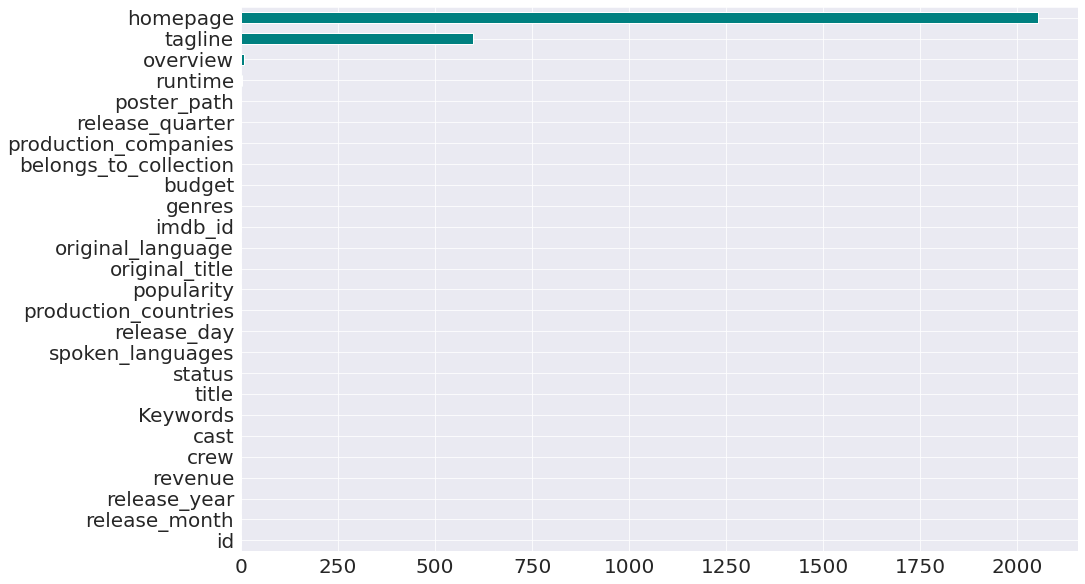

In [ ]:
fig = plt.figure(figsize=(15, 10))
main_df.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20, color='teal');

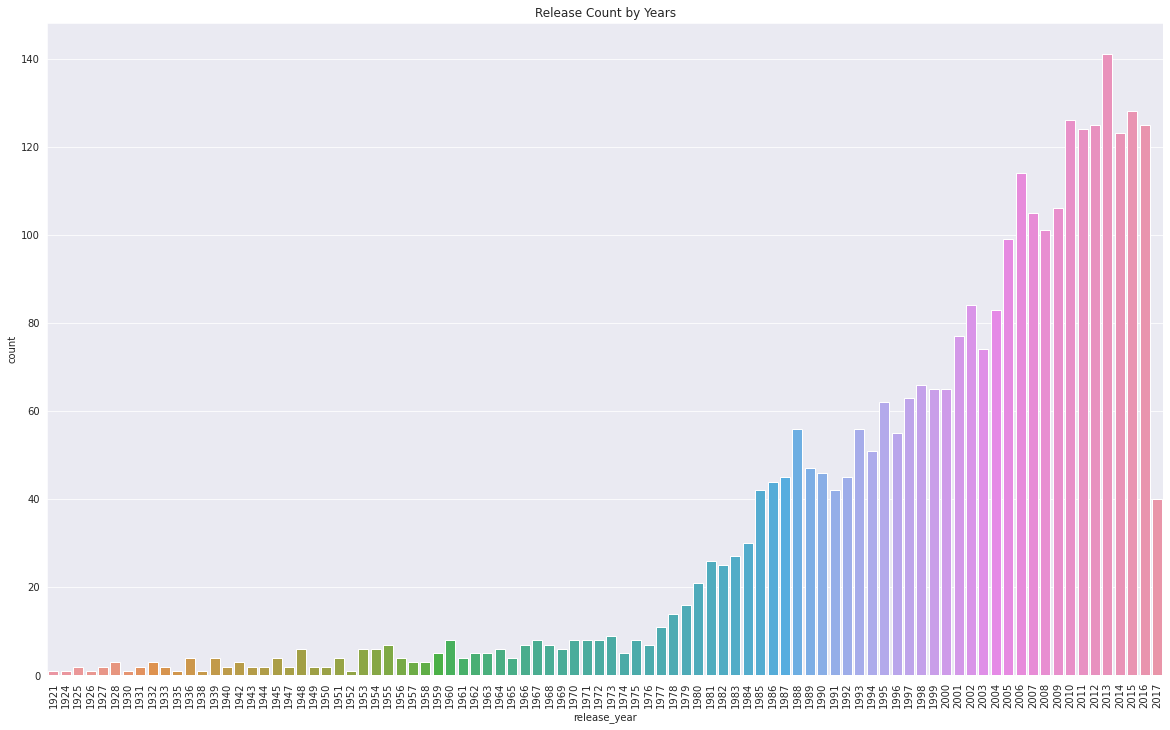

In [ ]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('Release Count by Years')
sns.countplot(main_df['release_year']);

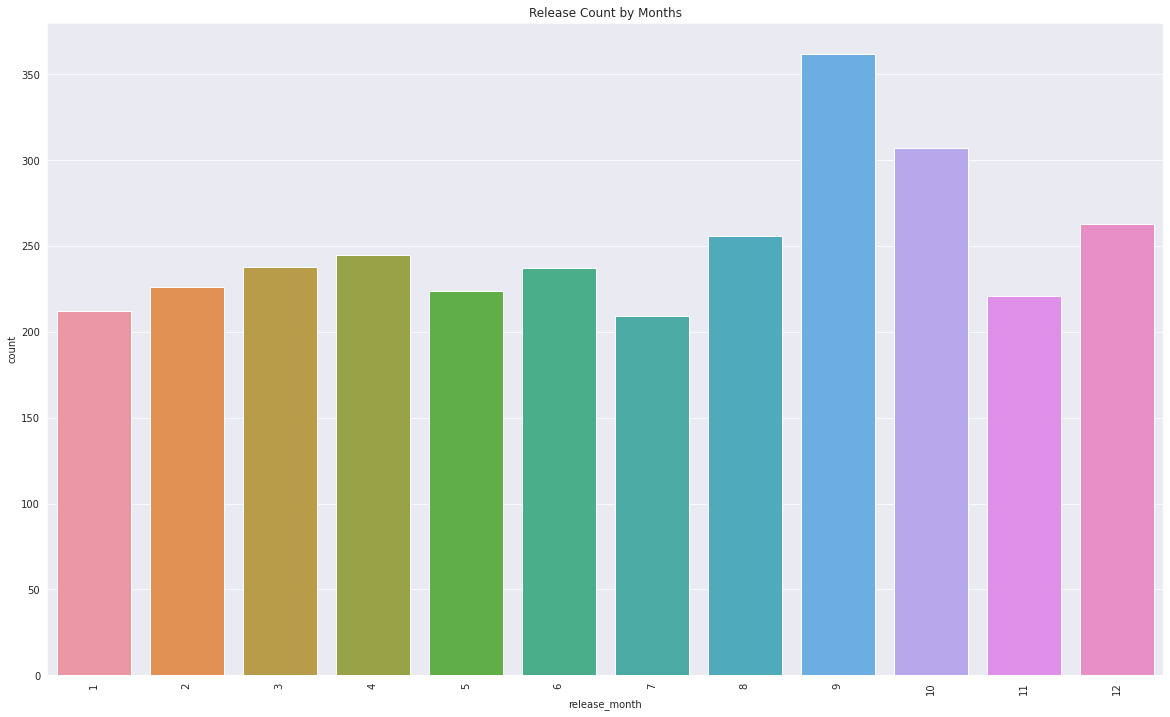

In [ ]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('Release Count by Months')
sns.countplot(main_df['release_month']);

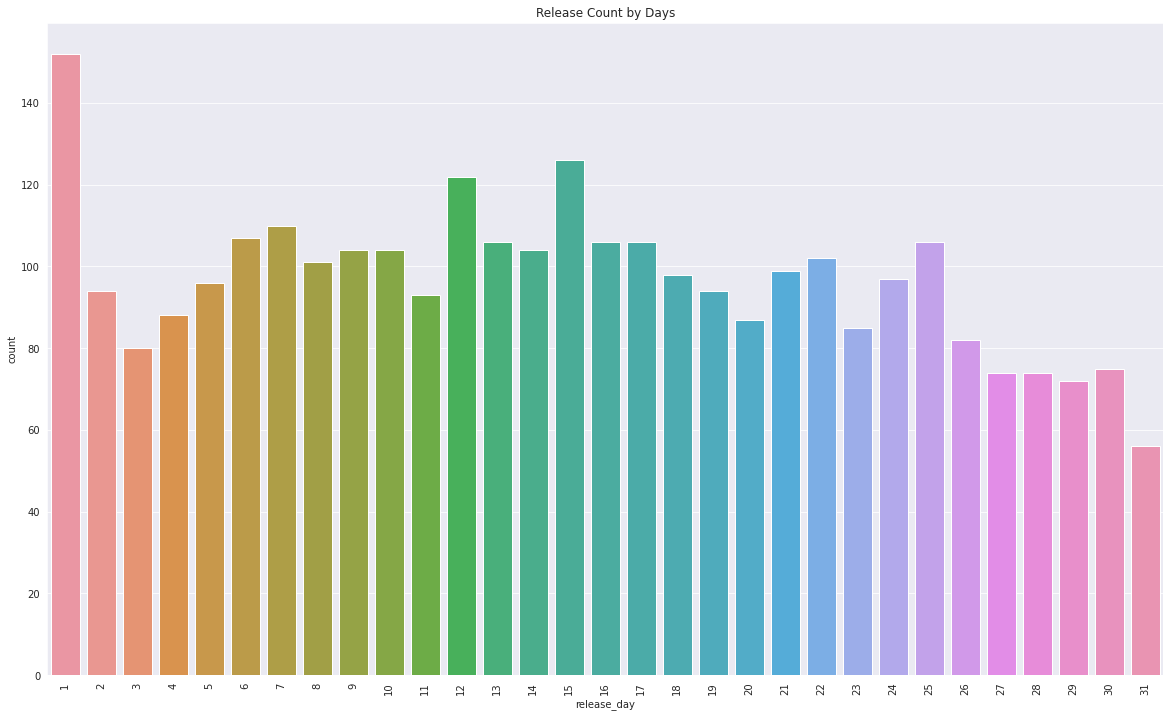

In [ ]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('Release Count by Days')
sns.countplot(main_df['release_day']);

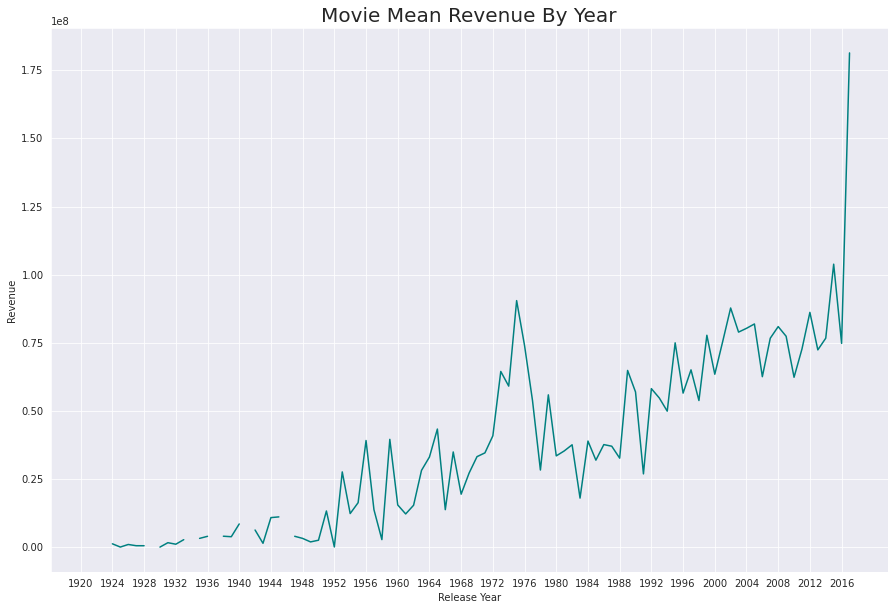

In [ ]:
main_df['meanRevenueByYear'] = main_df.groupby("release_year")["revenue"].aggregate('mean')
main_df['meanRevenueByYear'].plot(figsize=(15,10),color="teal")
plt.xticks(np.arange(1920,2020,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

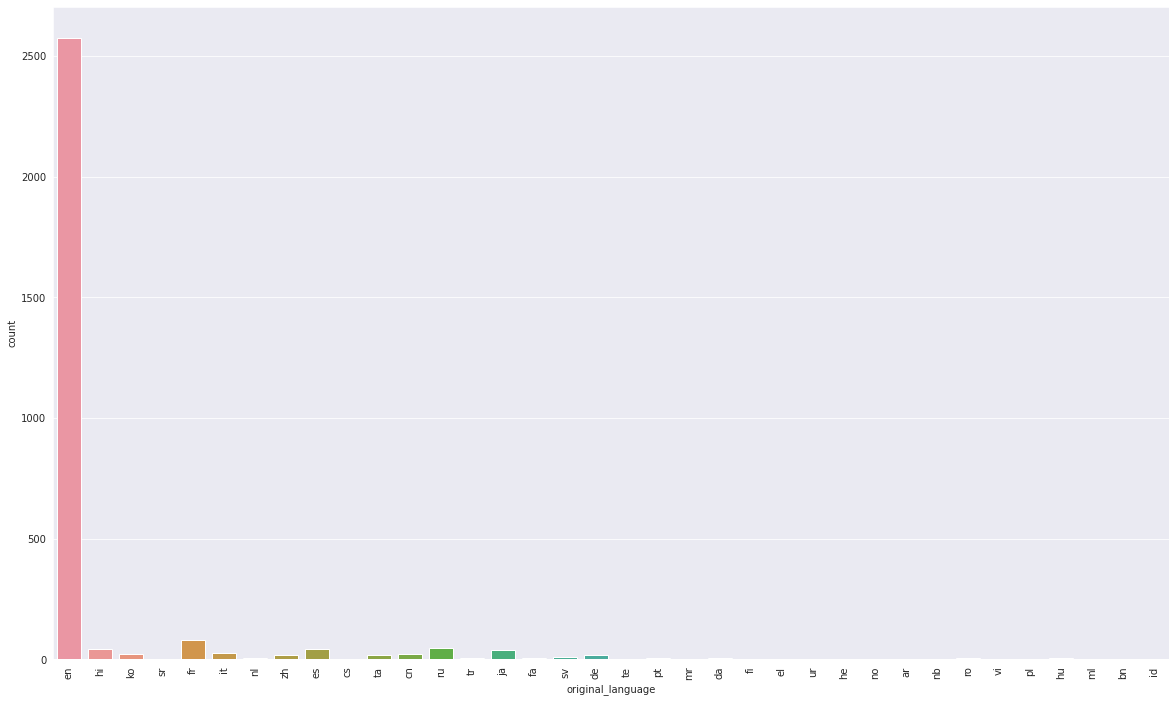

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(main_df['original_language'])
plt.xticks(rotation = 90);

TypeError: ignored

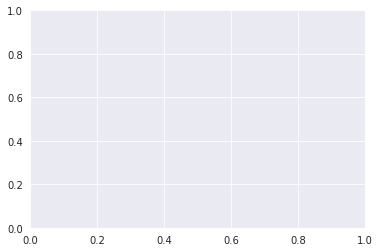

In [ ]:
plt.plot(data = main_df, x ='title', y= 'revenue')

In [ ]:
main_df.sort_values(by='revenue', ascending=False).head(20)[['title','revenue']]

# Model